Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [ ]:
NAME = "WEI YAN"
COLLABORATORS = ""

## Assignment tasks: Relationship between Price and House Type

In [1]:
import numpy as np
import pandas as pd
import re as re
all_header = []
HPDF = pd.read_csv(filepath_or_buffer = 'fulldata.csv',
                  engine='python',
                  sep=',',
                  #parse_dates = ["Month_Year"], index_col = ["Month_Year"],
                usecols=["Month_Year", "addr","municipality", "Region", "lp_dol", "type_own1_out", "style"],                        
                 )
HPDF.rename(columns={'lp_dol': 'ListPrice', 'type_own1_out': 'Type', 
                            'addr': 'Address', 'municipality': 'Municipality', 'style': 'Style' },inplace=True)
#HPDF['Month_Year'] = pd.to_datetime(HPDF['Month_Year']).dt.strftime('%y-%m')
HPDF['Month_Year']=HPDF['Month_Year'].replace('20', '2020', regex=True)
HPDF['Month_Year']=HPDF['Month_Year'].replace('21', '2021', regex=True)
HPDF['Month_Year'] = pd.to_datetime(HPDF['Month_Year']).dt.strftime('%Y-%m')
cleanedHPDF = HPDF.drop(columns=['Region','Municipality','Style', 'Address'])
cleanedHPDF.set_index('Month_Year', inplace=True)
cleanedHPDF

,ListPrice,Type
Month_Year,,
2020-04,938000,Detached
2020-04,825000,Detached
2020-04,929900,Detached
2020-04,930000,Detached
2020-04,1538888,Detached
...,...,...
2021-02,929000,Semi-Detached
2021-02,899900,Semi-Detached
2021-02,849999,Semi-Detached


Text(0.5, 1.0, 'Detached Monthly (2020-04 to 2021-03) Autocorrelation')

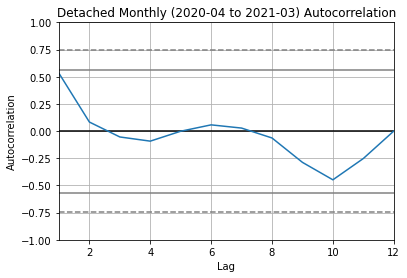

In [2]:
DeHPDF=cleanedHPDF[cleanedHPDF.Type !='Semi-Detached']
SemiDeHPDF=cleanedHPDF[cleanedHPDF.Type !='Detached']
by_MonthDe=DeHPDF.groupby("Month_Year").mean()
by_MonthSemiDe=SemiDeHPDF.groupby("Month_Year").mean()
import matplotlib.pyplot as plt
pd.plotting.autocorrelation_plot(by_MonthDe['ListPrice'])
plt.title('Detached Monthly (2020-04 to 2021-03) Autocorrelation')

Text(0.5, 1.0, 'Semi-Detached Monthly (2020-04 to 2021-03) Autocorrelation')

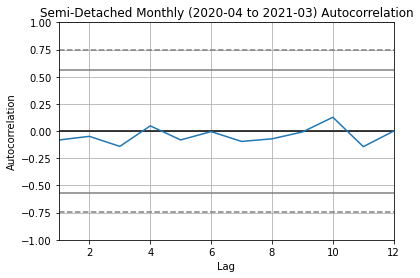

In [3]:
pd.plotting.autocorrelation_plot(by_MonthSemiDe['ListPrice'])
plt.title('Semi-Detached Monthly (2020-04 to 2021-03) Autocorrelation')

<p style="color:blue">Semi-detached and Detached monthly mean prices are not correlated in the past 12 months. <p>


array([[<AxesSubplot:xlabel='Detached Price', ylabel='Detached Price'>,
        <AxesSubplot:xlabel='Semi-Detached Price', ylabel='Detached Price'>],
       [<AxesSubplot:xlabel='Detached Price', ylabel='Semi-Detached Price'>,
        <AxesSubplot:xlabel='Semi-Detached Price', ylabel='Semi-Detached Price'>]],
      dtype=object)

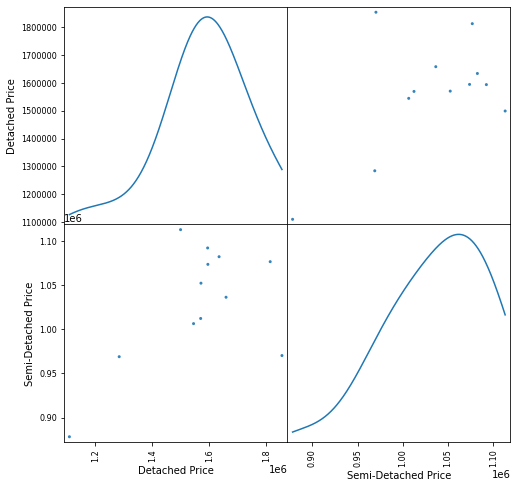

In [5]:
CleanDeHPDF=by_MonthDe.rename(columns={'ListPrice':'Detached Price'})
CleanSemiDeHPDF=by_MonthSemiDe.rename(columns={'ListPrice':'Semi-Detached Price'})
JoinDF=CleanDeHPDF.join(CleanSemiDeHPDF, how='outer')
pd.plotting.scatter_matrix(JoinDF, alpha=0.9, figsize=(8, 8), diagonal='kde')

<p style="color:blue">Detached and Semi-Detached monthly Price increased and droppred relatively in consistency <p>